## Weather Dataset:

In [157]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import statistics

### Reading Weather data 2020
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

### Small multiples

In [158]:
def draw_small_multiple(dataframe):
    columns = [c for c in list(dataframe.columns) if c != 'Data']
    
    fig,ax=plt.subplots(nrows=len(columns),ncols=1, figsize=(30,60))

    num = 0
    for c in columns: 
        
        ax[num].bar(dataframe['Data'],dataframe[c])
        ax[num].set_ylabel(c.split("(",1)[1].split(" )",1)[0])    
        ax[num].set_title(c, fontdict= { 'fontsize': 16, 'fontweight':'bold'})

        # Set the locator
        locator = mdates.MonthLocator()  # every month
        # Specify the format - %b gives us Jan, Feb...
        fmt = mdates.DateFormatter('%b')
        X = ax[num].xaxis
        X.set_major_locator(locator)
        # Specify formatter
        X.set_major_formatter(fmt)
        ax[num].grid(True)
        num+=1

    #ax[num-1].set_xlabel("Days")    
        
    sns.despine()
    # If you don't do tight_layout() you'll have weird overlaps
    plt.tight_layout()
    plt.show()

In [159]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data': str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data"] = dataFrame["Data"]
    dataFrame["Data"] = pd.to_datetime(dataFrame["Data"]) 
    #removing unamed column
    dataFrame = dataFrame.loc[:, ~dataFrame.columns.str.contains('^Unnamed')]
    #Removing empty column
    dataFrame.dropna(how='all', axis=1, inplace=True)
    
    return dataFrame


In [160]:
to_consolata_weather_data_2020 = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_2020.csv')
to_consolata_weather_data_2020

,Data,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Settore Prevalente,Tempo Permanenza ( min ),Radiazione totale ( MJ/mq )
0,2020-01-01,0.0,0.0,5.5,10.1,2.0,73,90,47,1.1,4.7,60.0,NE,320.0,6.6
1,2020-02-01,0.0,0.0,5.4,9.7,2.2,71,85,50,1.1,4.3,20.0,SSW,470.0,6.5
2,2020-03-01,0.0,0.0,5.0,7.9,3.2,77,85,59,0.8,3.0,100.0,SW,380.0,3.0
3,2020-04-01,0.0,0.0,7.0,12.5,2.5,65,89,41,1.3,4.1,90.0,SW,630.0,7.0
4,2020-05-01,0.0,0.0,7.1,11.1,3.8,66,83,42,1.0,4.5,120.0,NNE,320.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,0.0,0.0,1.5,3.3,-0.4,74,86,61,1.0,2.9,10.0,ENE,360.0,3.8
362,2020-12-28,1.8,0.0,1.1,2.9,-1.0,86,99,72,1.6,5.6,0.0,SSW,390.0,4.3
363,2020-12-29,0.0,1.8,1.5,4.8,-1.8,84,97,66,1.0,3.7,0.0,SSW,220.0,5.0
364,2020-12-30,0.0,0.0,3.9,6.9,2.0,73,85,55,1.2,4.5,0.0,SSW,510.0,6.0


### Small multiples

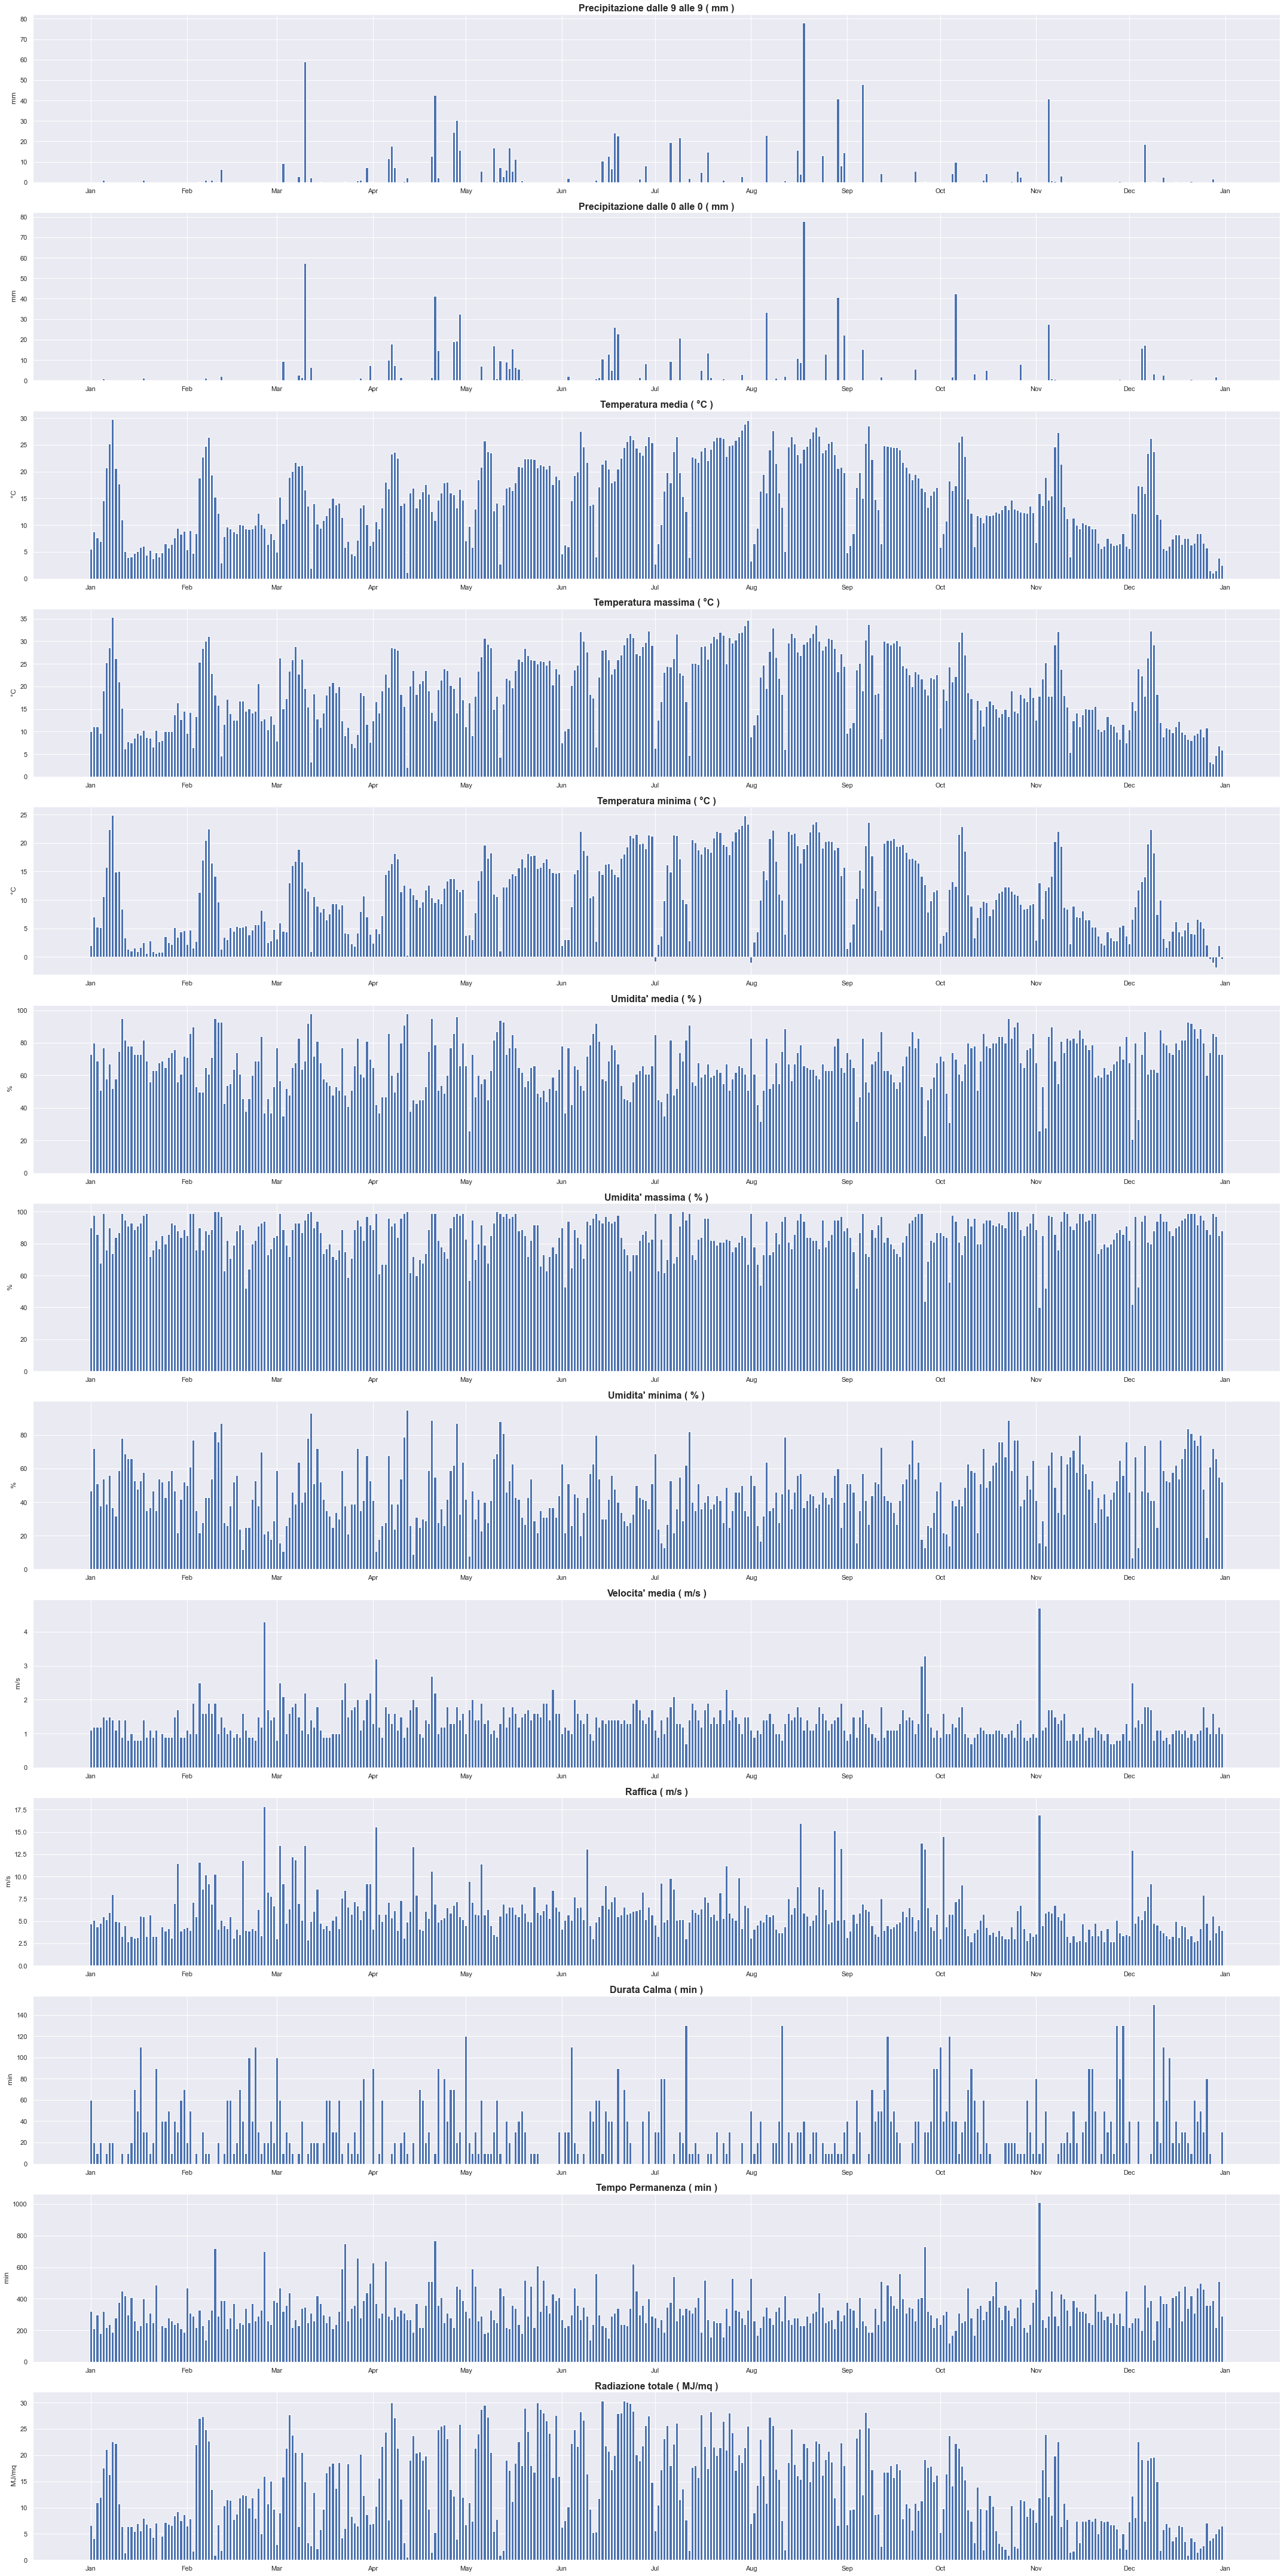

In [161]:
del to_consolata_weather_data_2020['Settore Prevalente']
draw_small_multiple(to_consolata_weather_data_2020)

### Reading Weather data 2012-2019
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [162]:
def get_average_2012_2019():
    yearly_data = []

    #getting all the dataset
    for x in range(2012, 2020):
        data = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_' + str(x) + '.csv')[['Data','Precipitazione dalle 9 alle 9 ( mm )','Precipitazione dalle 0 alle 0 ( mm )','Temperatura media ( °C )','Temperatura massima ( °C )','Temperatura minima ( °C )',"Umidita' media ( % )","Umidita' massima ( % )","Umidita' minima ( % )","Velocita' media ( m/s )",'Raffica ( m/s )','Durata Calma ( min )','Tempo Permanenza ( min )', 'Radiazione totale ( MJ/mq )']]
        #take only the day of the year
        data['Data']= data['Data'].dt.dayofyear
        yearly_data.append(data)

    #create daily baseline
    avg_daily_baseline=pd.concat([yearly_data[0],yearly_data[1],yearly_data[2],yearly_data[3],yearly_data[4],yearly_data[5],yearly_data[6],yearly_data[7]]).groupby('Data', as_index=True).mean()
    avg_daily_baseline.reset_index(inplace = True)
    
    return avg_daily_baseline

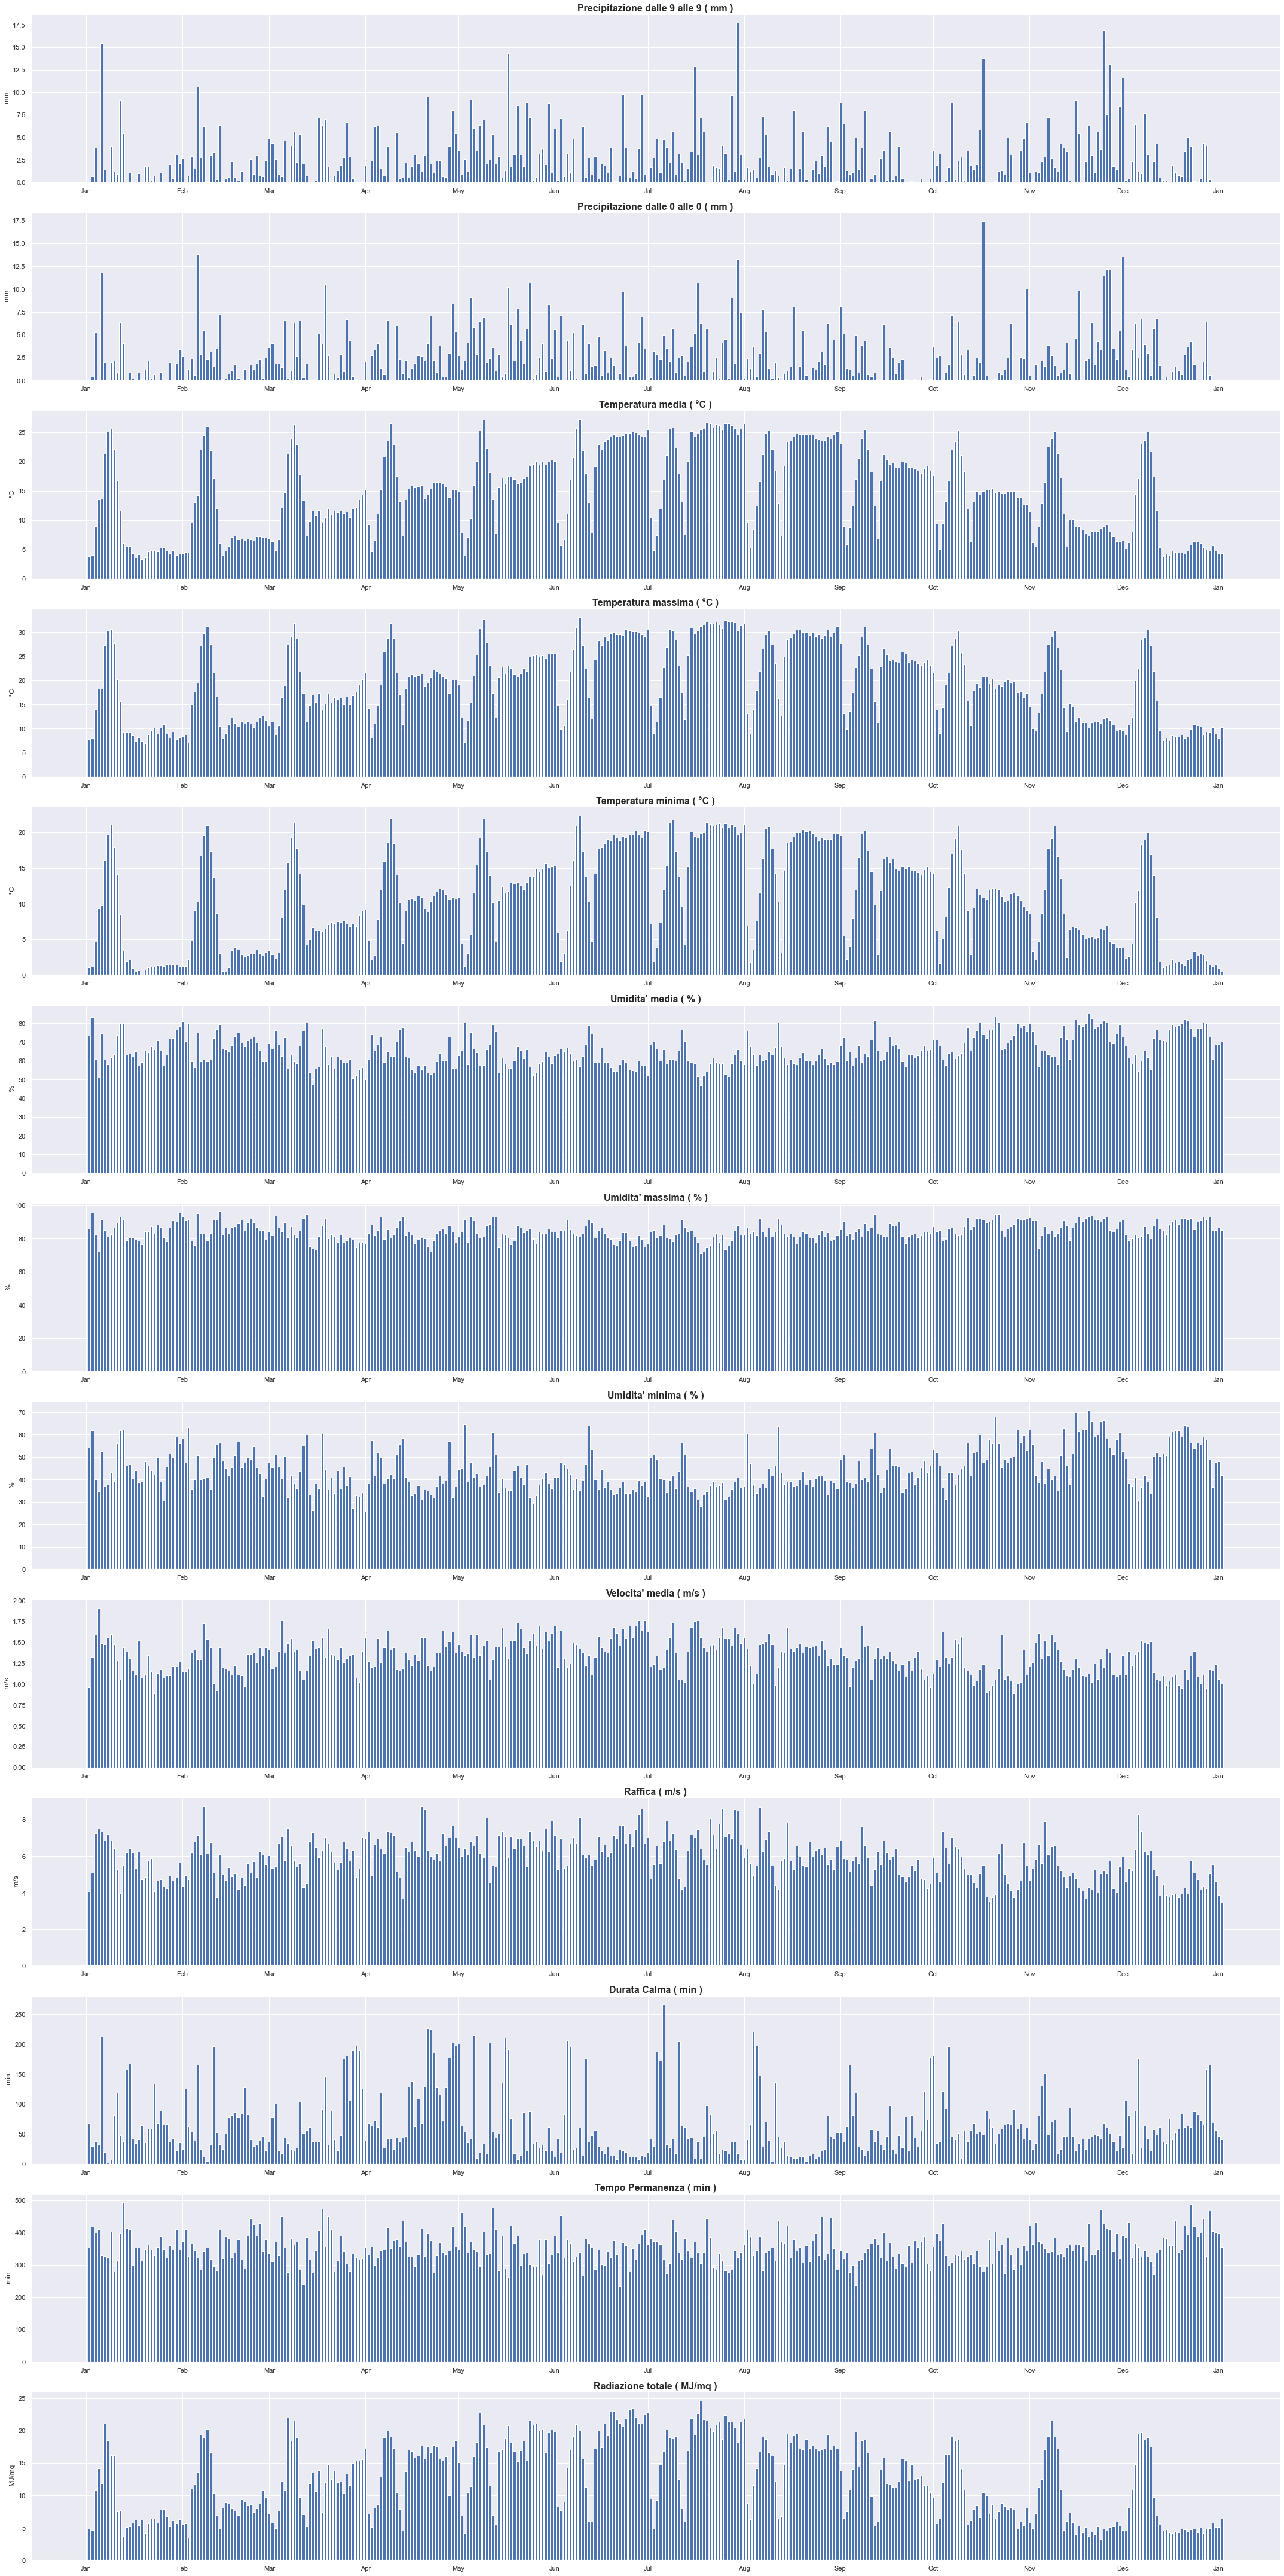

In [163]:
draw_small_multiple(get_average_2012_2019())

### Average 2012-2019 vs 2020 Comparison

In [164]:
to_weather_consolata_avg_2021_2019 = get_average_2012_2019()[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
to_weather_consolata_2020 = to_consolata_weather_data_2020[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
to_weather_consolata_2020['Data'] = to_weather_consolata_2020['Data'].dt.dayofyear

to_weather_consolata_avg_2021_2019.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation Average 2012-2019 ( mm )'}, inplace = True)
to_weather_consolata_2020.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation 2020 ( mm )'}, inplace = True)
#group by week
# to_weather_consolata_avg_2021_2019 = to_weather_consolata_avg_2021_2019.resample('W', on='Data').mean()
# to_weather_consolata_2020 = to_weather_consolata_2020.resample('W', on='Data').mean()
#creating grouped data
# to_weather_consolata_avg_2021_2019['Data rilevamento'] = to_weather_consolata_avg_2021_2019.index.get_level_values('Data').strftime('%U/%m')
# to_weather_consolata_2020['Data rilevamento'] = to_weather_consolata_2020.index.get_level_values('Data').strftime('%U/%m')
#merge data
merged_consolata_avg_2020 = pd.merge(to_weather_consolata_avg_2021_2019 ,to_weather_consolata_2020 ,on=['Data','Data'])
merged_consolata_avg_2020.set_index("Data",inplace=True)

Text(0.5, 0, 'Day of the Year')

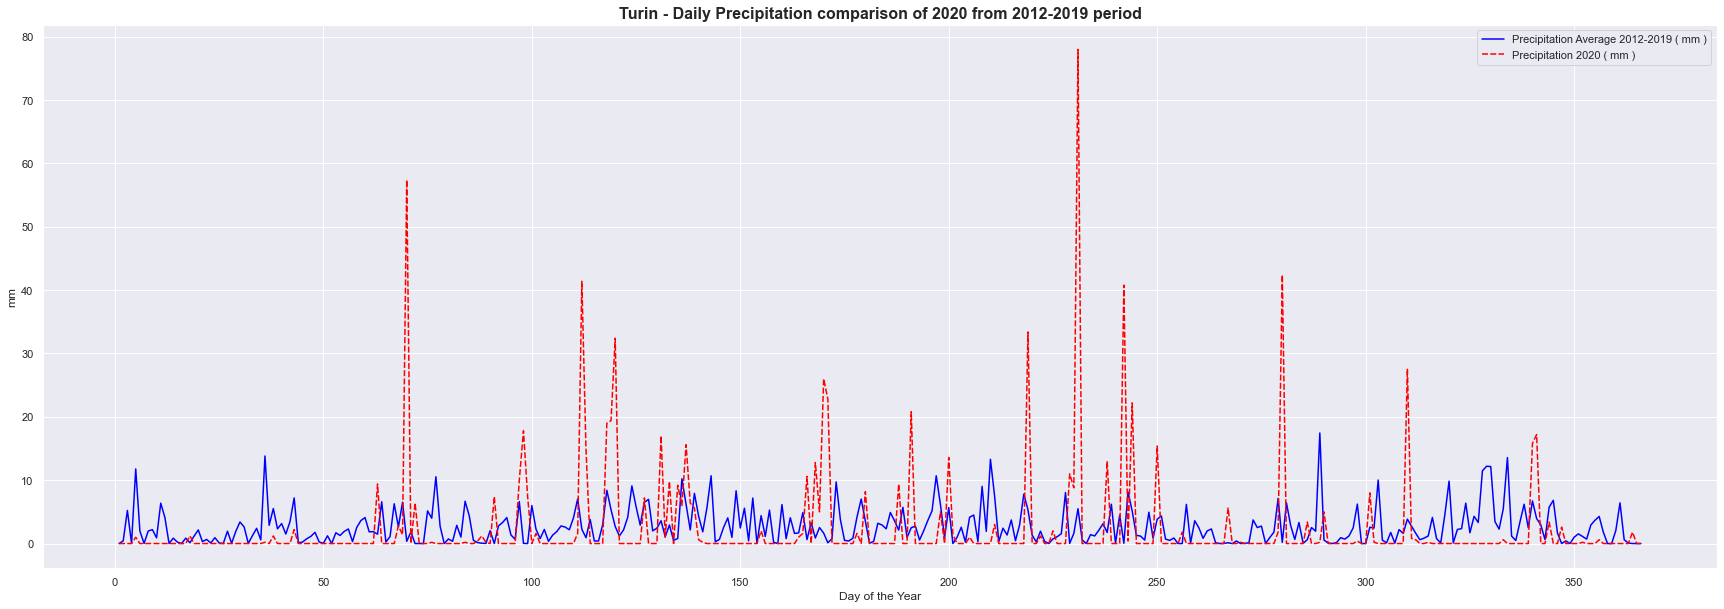

In [165]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_avg_2020, palette=palette)
plt.title("Turin - Daily Precipitation comparison of 2020 from 2012-2019 period",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel("mm")
plt.xlabel("Day of the Year")

### Daily Precipitation Variation

In [166]:
def get_precipitation_variation():
    avg_prec = get_average_2012_2019()[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
    prec_2020 = to_consolata_weather_data_2020[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']].copy()
    avg_prec.set_index('Data', inplace=True)
    
    prec_variation=prec_2020.copy()
    prec_variation['Data Rivelamento'] = prec_variation['Data']
    prec_variation['Data'] = prec_variation['Data'].dt.dayofyear
    prec_variation.set_index('Data', inplace=True)
    prec_variation['Precipitazione dalle 0 alle 0 ( mm )'] = prec_variation['Precipitazione dalle 0 alle 0 ( mm )'] - avg_prec['Precipitazione dalle 0 alle 0 ( mm )']
   
    prec_variation.reset_index(inplace=True)
    prec_variation.drop(columns=['Data'], inplace=True)
    prec_variation.rename(columns = {'Data Rivelamento':'Data', 'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation Variation ( mm )'}, inplace = True)
    prec_variation.set_index('Data', inplace=True)

    return prec_variation
    

Text(0.5, 0, 'Date')

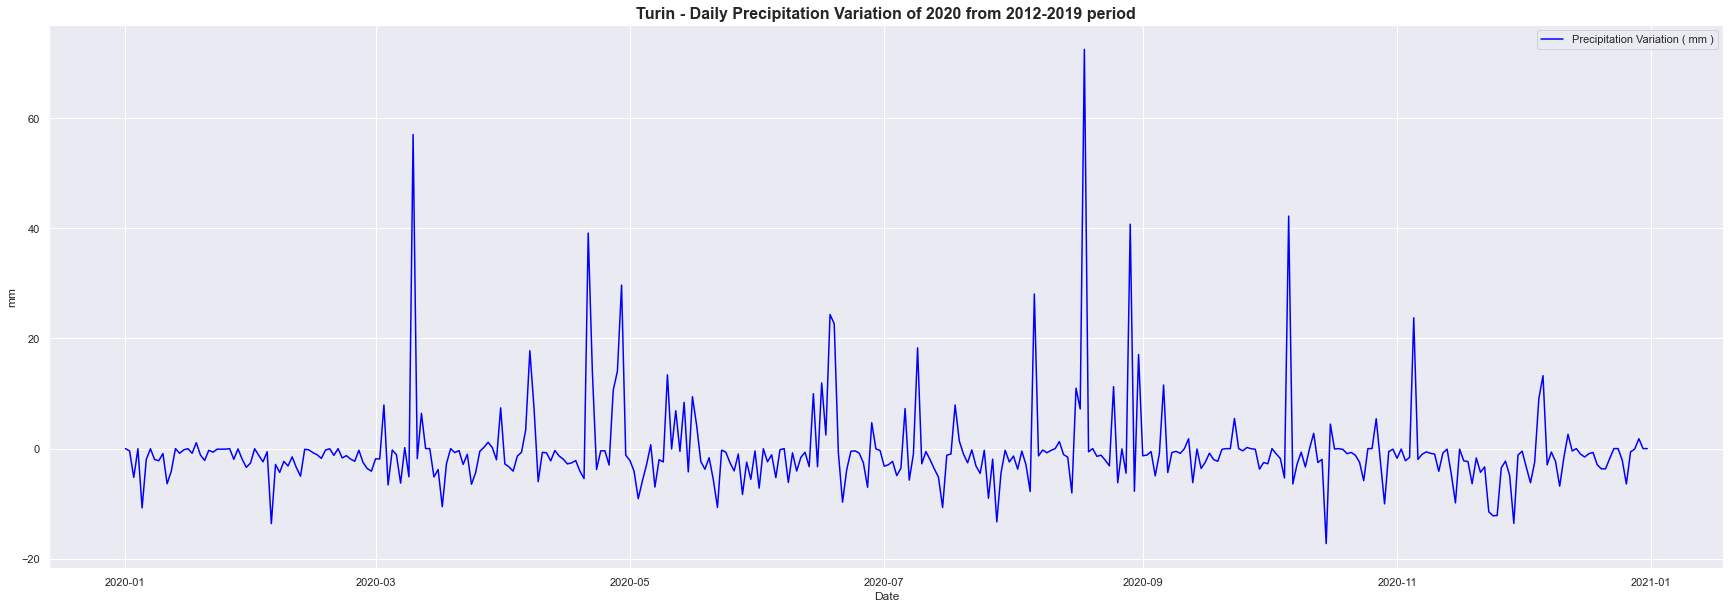

In [170]:
precipitation_var = get_precipitation_variation().copy()

sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue"]
sns.lineplot(data=precipitation_var, palette=palette)
plt.title("Turin - Daily Precipitation Variation of 2020 from 2012-2019 period",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel("mm")
plt.xlabel("Date")

In [168]:
def get_change_from_2012_2019(year):

    avg_daily_baseline = get_average_2012_2019().copy()

    #Unpivot a DataFrame from wide to long format
    avg_daily_baseline = avg_daily_baseline.melt(id_vars="Data", value_vars=['Precipitazione dalle 0 alle 0 ( mm )',"Velocita' media ( m/s )",'Temperatura media ( °C )',"Umidita' media ( % )"],
        var_name='type', value_name='value', ignore_index=True)
    avg_daily_baseline.dropna(inplace=True)
    avg_daily_baseline= avg_daily_baseline[avg_daily_baseline['value'] != 0]
    
    #get 2020 data
    data_2020 = read_ARPA_csv('data/Weather/TORINO_VIA_DELLA_CONSOLATA_giornalieri_'+ year +'.csv')[['Data','Precipitazione dalle 0 alle 0 ( mm )',"Velocita' media ( m/s )","Temperatura media ( °C )","Umidita' media ( % )"]]
    data_2020['Giorno']= data_2020['Data'].dt.dayofyear

    #Unpivot a DataFrame from wide to long format
    data_2020 = data_2020.melt(id_vars=["Data", "Giorno"], value_vars=['Precipitazione dalle 0 alle 0 ( mm )',"Velocita' media ( m/s )",'Temperatura media ( °C )',"Umidita' media ( % )"],
        var_name='type', value_name='value', ignore_index=True)

    data_2020= data_2020[data_2020['value'] != 0]

    data_2020.set_index('Giorno')
    avg_daily_baseline.set_index('Data')

    #calculate percentage deviation
    #print(data_2020)
    return_data = data_2020
    return_data['value'] = ((data_2020['value']-avg_daily_baseline['value'])/avg_daily_baseline['value'])*100

    #resetting index
    return_data.set_index('Data')

    #remove nan column and useless column
    # return_data.dropna(inplace=True)
    return_data= return_data[return_data['value'].between(-100, 100)]
    del return_data['Giorno']

    #transform data from long to wide again
    return_data = return_data.pivot(index='Data', columns='type', values='value')
    return_data.reset_index(inplace=True)

    #rename column
    return_data= return_data.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation ( % )',"Velocita' media ( m/s )":'Wind ( % )','Temperatura media ( °C )':'Average Temperature ( % )',"Umidita' media ( % )":'Average Humidity ( % )'})

    return return_data

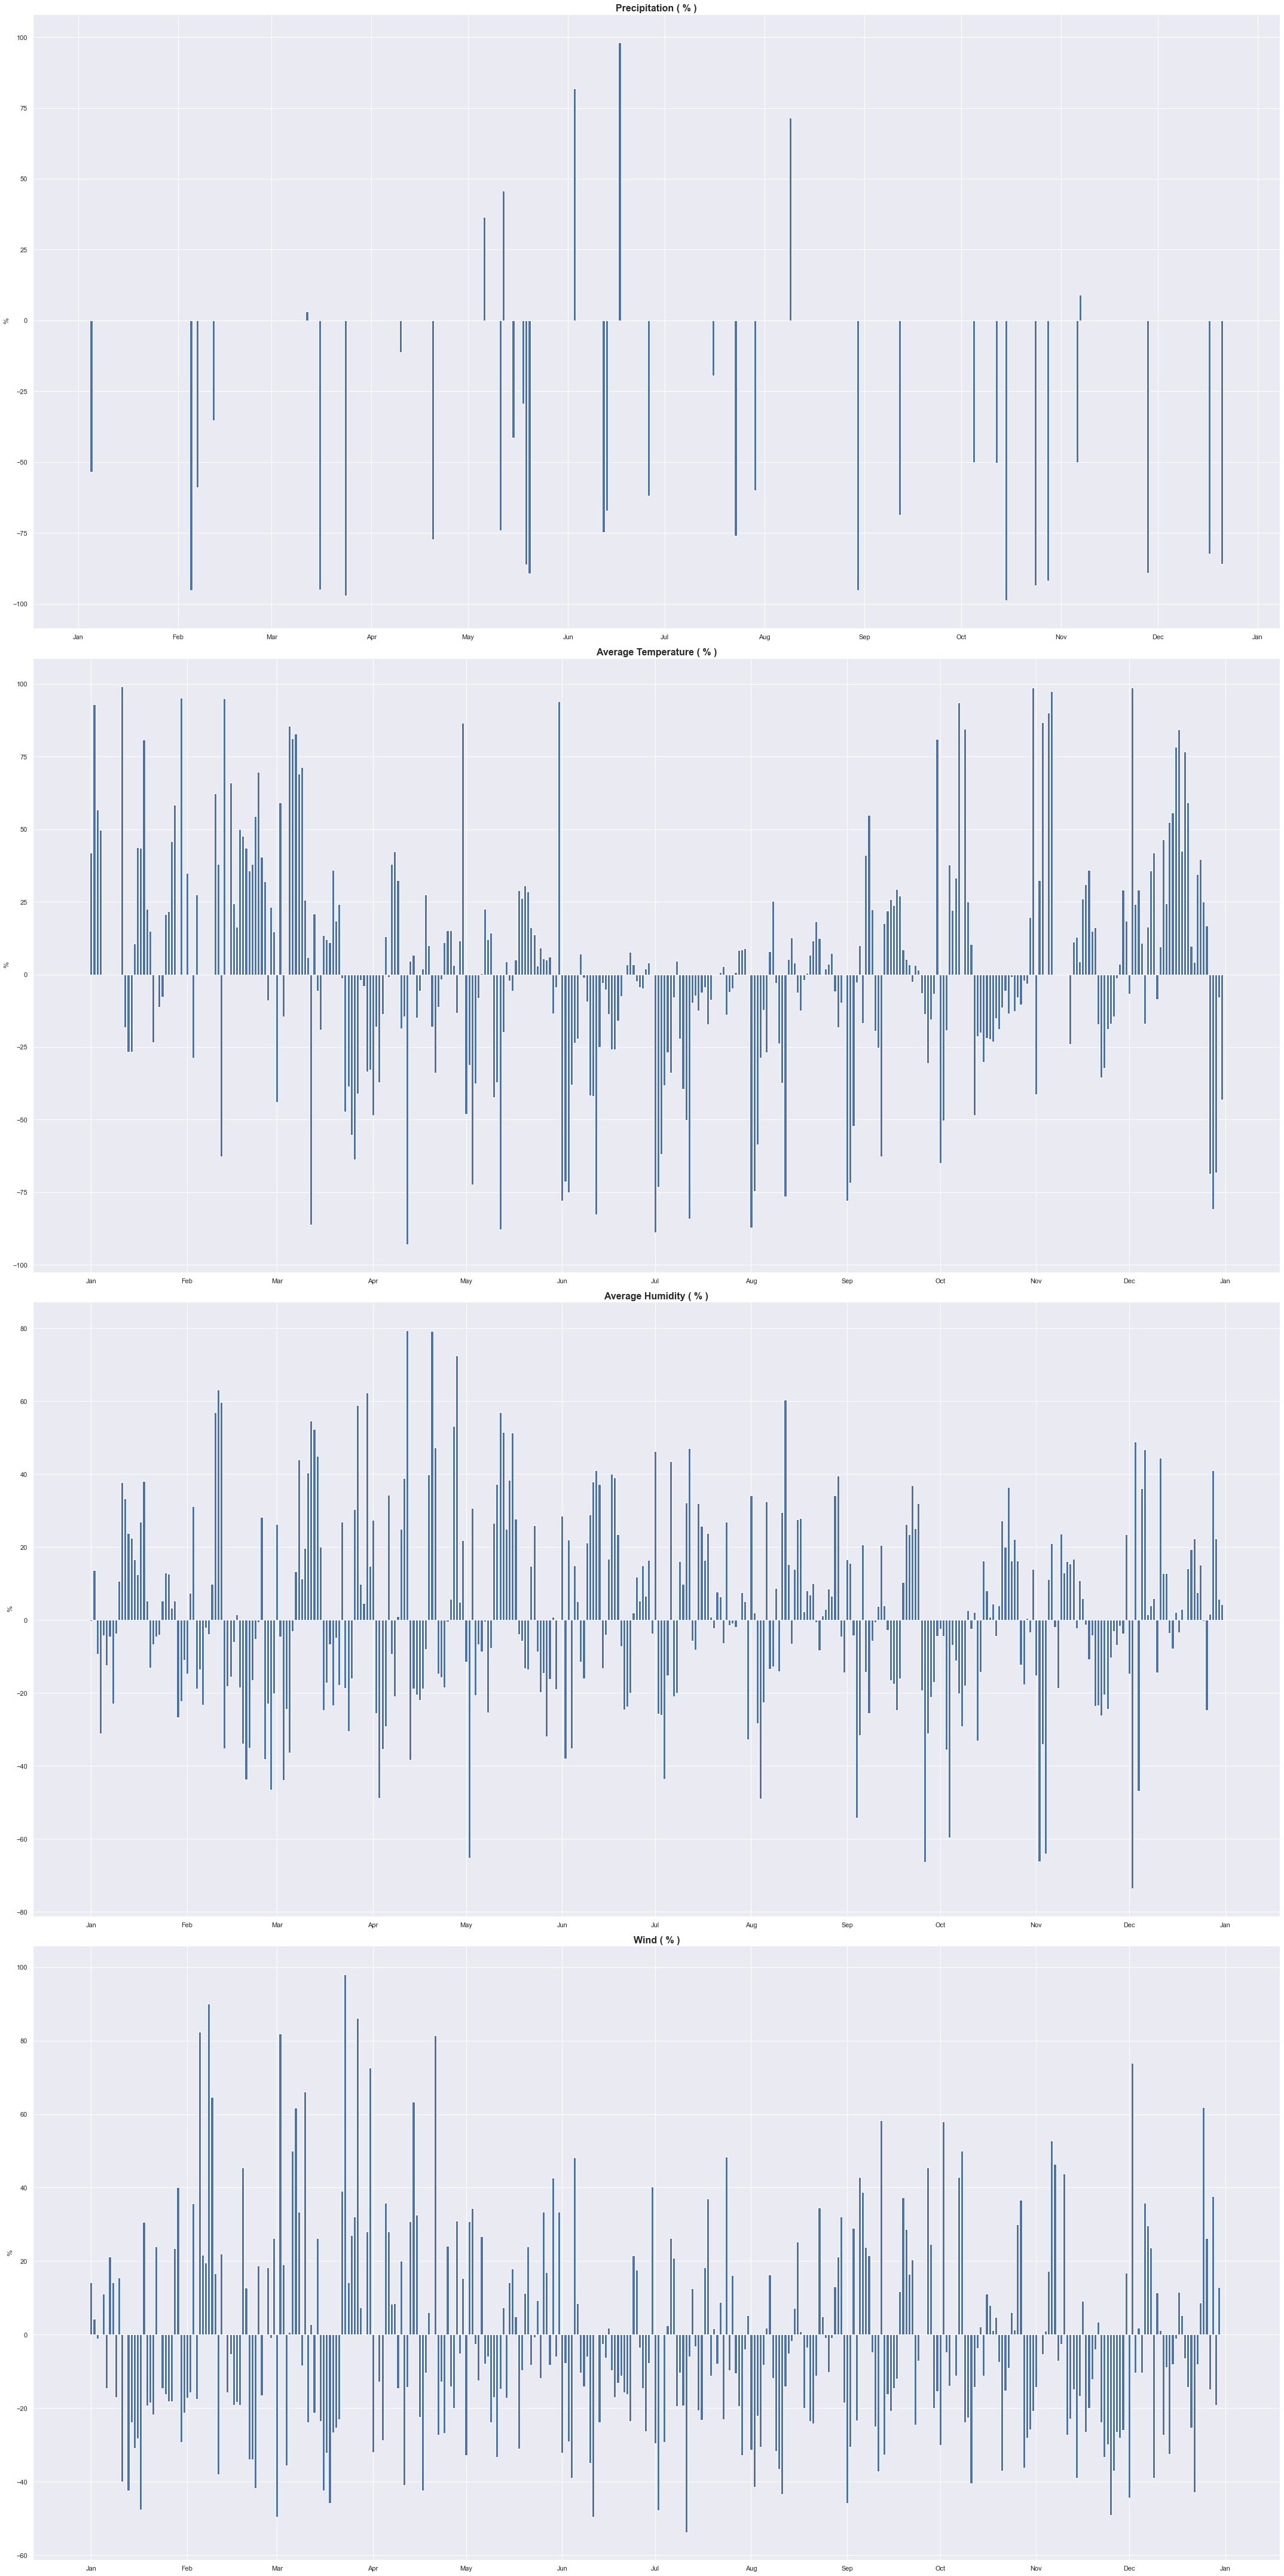

In [169]:
draw_small_multiple(get_change_from_2012_2019('2020'))